In [1]:
from functions import *

# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results_proposed_time_consumption/result_summary.csv"
time_data = parse_time_data(summary_result_path)

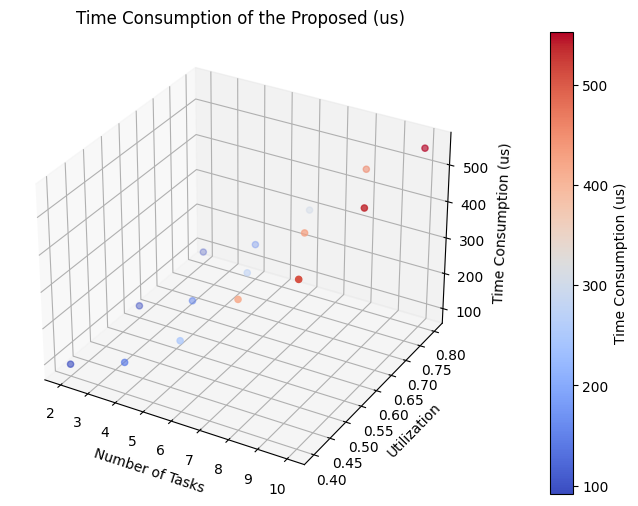

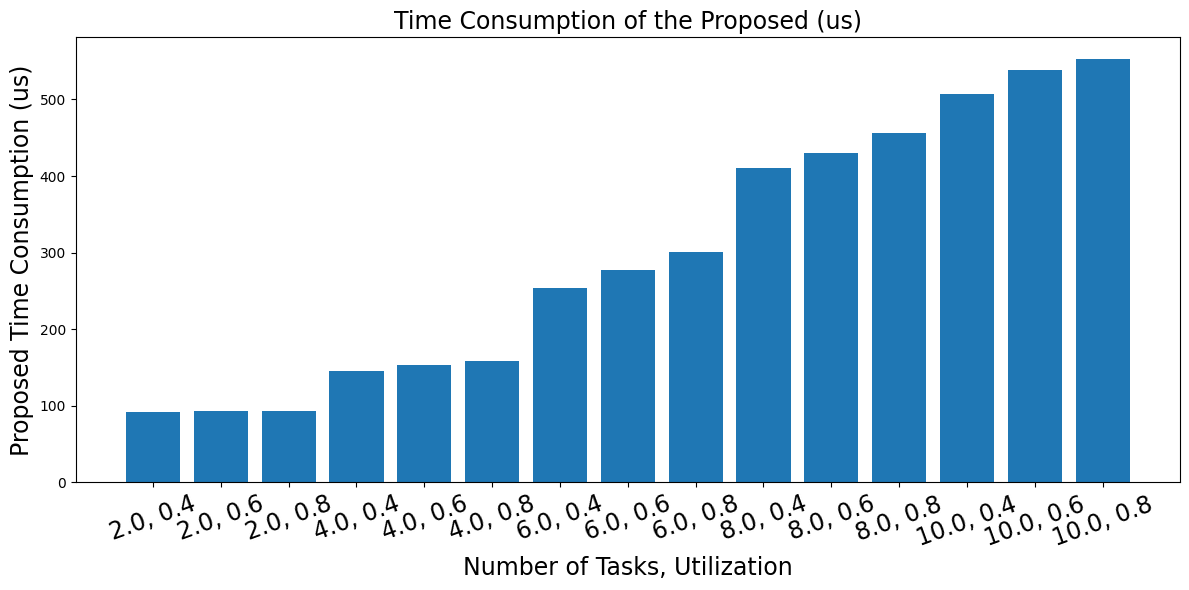

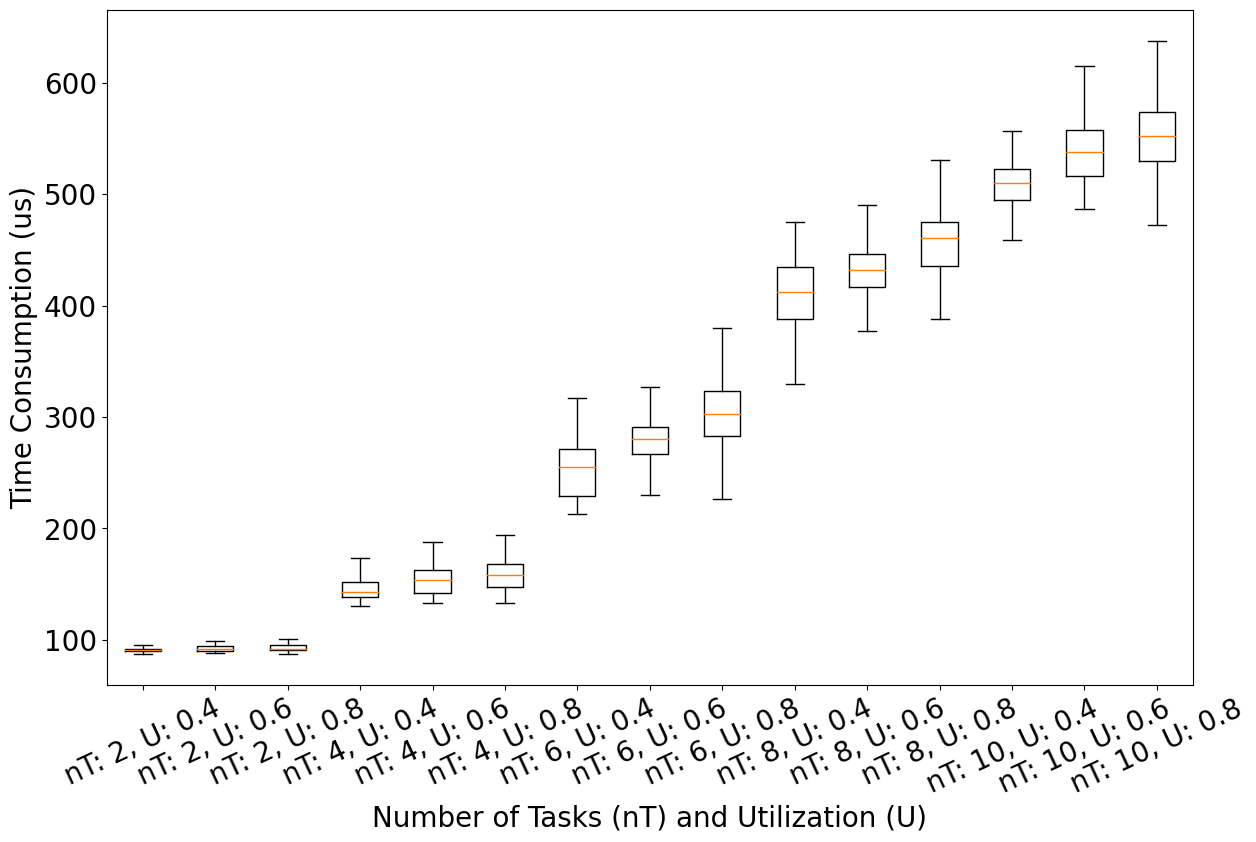

Max :  641 Min :  87


In [2]:
# visualize the time consumption of the proposed algorithm
values = "proposed_timeConsumption(us)"
title = 'Time Consumption of the Proposed (us)'
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title, 17, 20)
show_box_plot(summary_result_path, values, title, 20, 25)